In [1]:
## Install library
!pip install dtreeviz

In [2]:
!pip install graphviz

In [1]:
## Imports needed to do visualization in jupyter notebook
import graphviz.backend as be
from IPython.display import Image,display_svg,SVG

In [2]:
## Import dataset and installed library
from sklearn.datasets import load_iris
from dtreeviz.trees import *

In [3]:
## Load data and train the classifier
clas=tree.DecisionTreeClassifier(max_depth=2)

iris=load_iris()
X_train=iris.data
Y_train=iris.target

clas.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

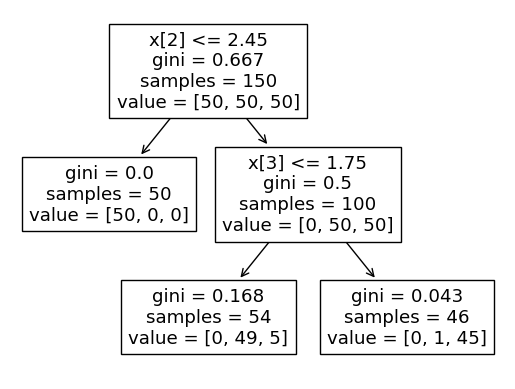

In [4]:
## Visualize the tree with plot_tree
from sklearn.tree import plot_tree
plot_tree(clas)

### Classification

In [5]:
import dtreeviz

In [9]:
#1. Classification
## Need to pass DT object, X_train and Y_train,feature names,class names and target name
viz_model = dtreeviz.model(clas,
                           X_train=X_train, y_train=Y_train,
                           feature_names=iris.feature_names,
                           class_names=['setosa','versicolor','virginica'],target_name='Type of flower')

Graphviz executables was having issue. Ran conda install graphviz solved the problem.

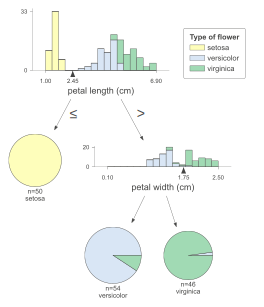

In [10]:
## View will show the model.
viz_model.view()

This visualization is much more interpretable. Its clearly visible that at level 1 the splitting is happening on petal length and on level 2 its happening on petal width. Also the number is clear.On level 1 its 2.45 petal length and on level 2 its 1.75 petal width. Number of samples is also specified.

If we remove the max_depth parameter from classifier then a fully grown tree will get constructed and that can be visualized with above dtreeviz visualization.

### Regression

In [12]:
## Create regressor object and train
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

X_train=diabetes.data
Y_train=diabetes.target

reg=tree.DecisionTreeRegressor(max_depth=2)

reg.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2)

In [18]:
## Visualize
viz_model_reg=dtreeviz.model(reg,X_train=X_train,y_train=Y_train,feature_names=diabetes.feature_names,target_name='disease Progression')

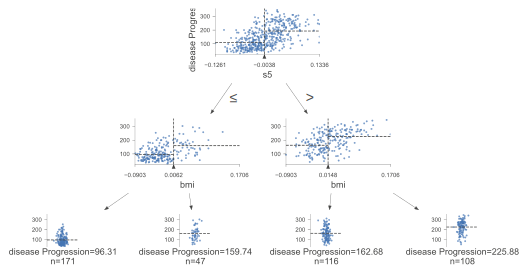

In [19]:
viz_model_reg.view()

On leaf nodes all the points target's average  is calculated. If a new test point is coming who is having < -0.0038 s5 value and < 0.0062 bmi then we will directly say the disease progression is 96.31  .

### Horizontal Decision Trees

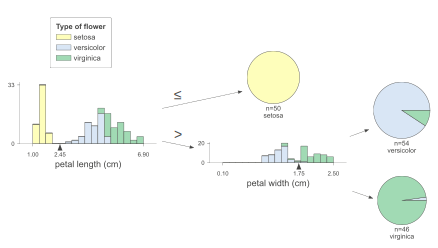

In [21]:
## Inside view method pass orientation as LR which specifies left to right visualization of Decision Tree.
viz_model.view(orientation='LR')

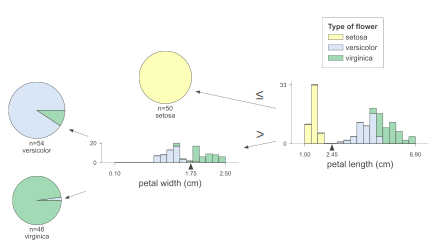

In [22]:
## Inside view method pass orientation as LR which specifies right to left visualization of Decision Tree.
viz_model.view(orientation='RL')

### Show Prediction Path

In [34]:
## Idea here is when we have to test decision tree then we give a new test point and try to understand in which branch of DT it will fall.

clas=tree.DecisionTreeClassifier(max_depth=2)
iris=load_iris()

X_train=iris.data
Y_train=iris.target

clas.fit(X_train,Y_train)

## Test point
X= iris.data[np.random.randint(0,len(iris.data)),:]

viz_model_clas2=dtreeviz.model(clas,
                           X_train=X_train, y_train=Y_train,
                           feature_names=iris.feature_names,
                           class_names=['setosa','versicolor','virginica'],target_name='Type of flower')

viz_model_clas2.explain_prediction_path(X)

'0.8 <= petal width (cm)  < 1.75\n'

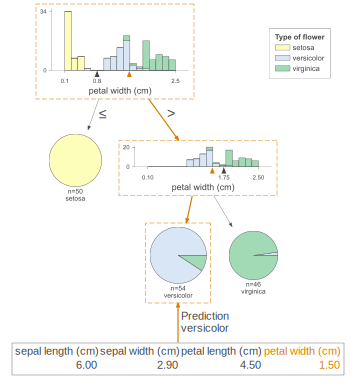

In [35]:
## View the path visually
viz_model_clas2.view(x=X)

### Show node number.

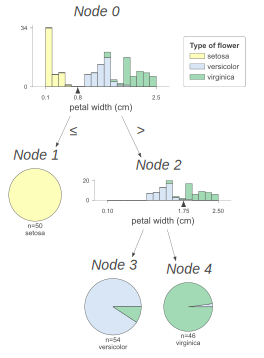

In [37]:
## We can see how many nodes are there in Decision tree.
viz_model_clas2.view(show_node_labels=True)

While numbering the nodes always the one subtree will be completed first then next subtree numbering will start. For demo, run any of above DT without max_depth parameter.

### Without graphs

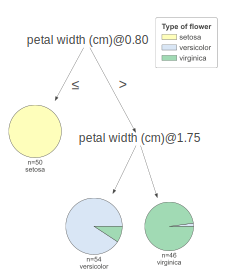

In [38]:
## When we dont want bar plots / scatter plots then we can follow this.

viz_model_clas2.view(fancy=False)

### Show Just Path

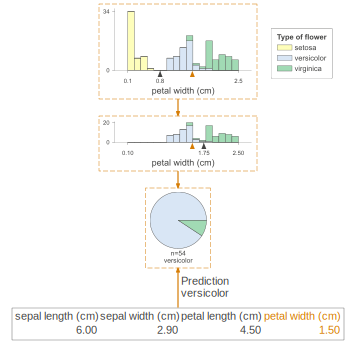

In [42]:
## In above scenario we are visualizing the prediction path but there entire tree was shown along with path followed by test point.
## But when we want to see the path followed by test point nothing else then we can do this.

viz_model_clas2.view(x=X,show_just_path=True)

### Explain Prediction Path in Plain English

In [48]:
viz_model_clas2.explain_prediction_path(x=X)

'0.8 <= petal width (cm)  < 1.75\n'

### Feature Importances

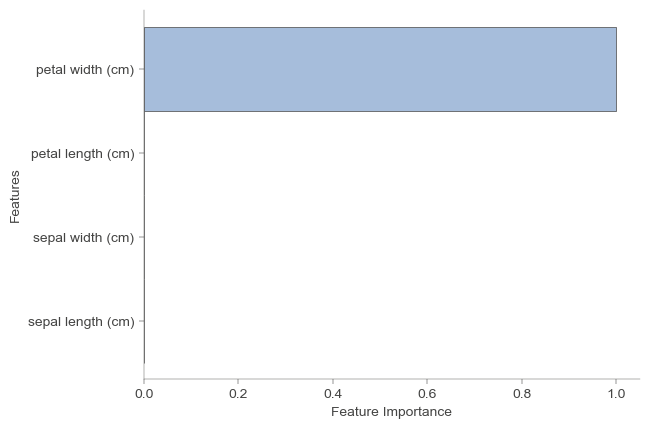

In [50]:
viz_model_clas2.instance_feature_importance(x=X,)

With above we can get idea on which feature is very important while doing prediction.